<a href="https://colab.research.google.com/github/ShamanthNyk/Sparks-Foundation-Tasks/blob/master/Iris_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing

from sklearn.cluster import KMeans

In [14]:
url = 'https://raw.githubusercontent.com/ShamanthNyk/Sparks-Foundation-Tasks/master/Kmeans%20Clustering/Iris.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [15]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.drop("Id",axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.shape

(150, 5)

In [18]:
label_encoder=preprocessing.LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])

In [19]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [20]:
df['Species'].unique()

array([0, 1, 2])

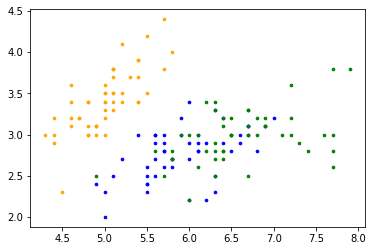

In [21]:
x = df.iloc[:, [0, 1, 2, 3]].values
y= df['Species']
# Length of training data
n = x.shape[0]
# Number of features in the data
c = x.shape[1]

# Plotting the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(x[i, 0], x[i,1], s=7, color = colors[int(y[i])])

In [22]:
#try with a random number for clusters
#Clusters=5
Kmean = KMeans(n_clusters=5)
Kmean.fit(x)
centers = Kmean.cluster_centers_


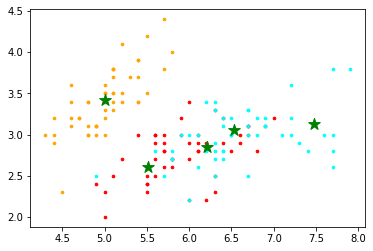

In [23]:
colors=['orange', 'red', 'cyan']
for i in range(n):
    plt.scatter(x[i, 0], x[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

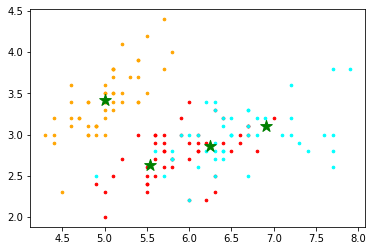

In [24]:
#Clusters=4


Kmean = KMeans(n_clusters=4)
Kmean.fit(x)
centers = Kmean.cluster_centers_
colors=['orange', 'red', 'cyan']
for i in range(n):
    plt.scatter(x[i, 0], x[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

# ELBOW METHOD TO FIND OPTIMUM NUMBER OF **CLUSTERS**

---



---



---



---



In [25]:
df1=pd.DataFrame(df.iloc[:, [0,1,2,3]].values)
df1.head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
d_target=pd.DataFrame(df['Species'])
d_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [27]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

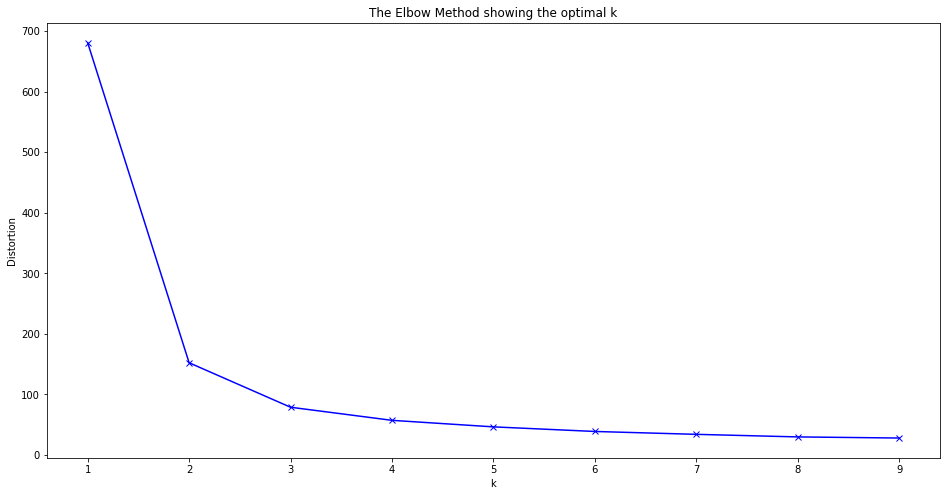

In [28]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
# So we see the optimum is at k=3
# Let's create a model again and check how it looks with and without clustering

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
iris = datasets.load_iris()
df1['res']=kmeanModel.predict(df1)
df1['target']=iris['target']
df1.head()

,0,1,2,3,res,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Text(0.5, 1.0, 'K_Means_Clusters(3)')

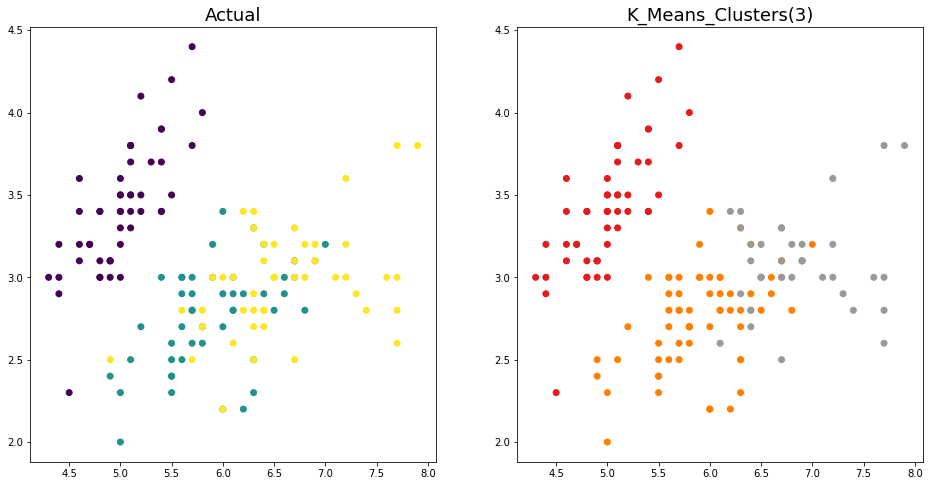

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df1[0], df1[1], c=df1['target'])
axes[1].scatter(df1[0], df1[1], c=df1['res'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means_Clusters(3)', fontsize=18)

**VISULALIZING** **IN** **A** **BETTER** **WAY**

In [32]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [33]:
kmeans_new = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_new = kmeans_new.fit_predict(x)

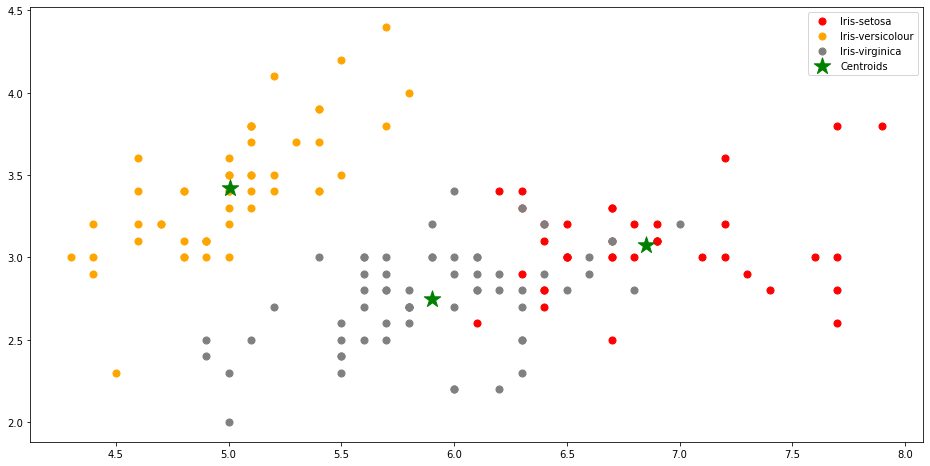

In [34]:
plt.figure(figsize=(16,8))

plt.scatter(x[y_kmeans_new == 0, 0], x[y_kmeans_new == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans_new == 1, 0], x[y_kmeans_new == 1, 1], 
            s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans_new == 2, 0], x[y_kmeans_new == 2, 1],
            s = 50, c = 'gray', label = 'Iris-virginica')

# Plotting the centroids of the clusters
centers = kmeans_new.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=300,label='Centroids')



plt.legend()